In [202]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image

In [203]:
def rgb2gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    return 0.2989*r + 0.5870*g + 0.1140*b

In [204]:
images = []
for i in range(100):
    img = plt.imread(f"./shapes/circles/drawing({i+1}).png")
    images.append(rgb2gray(img).reshape(784,))
for i in range(100):
    img = plt.imread(f"./shapes/squares/drawing({i+1}).png")
    images.append(rgb2gray(img).reshape(784,))
for i in range(100):
    img = plt.imread(f"./shapes/triangles/drawing({i+1}).png")
    images.append(rgb2gray(img).reshape(784,))

In [205]:
X_train = np.array(images)
y_train = np.zeros(300)
for i in range(100, 200):
    y_train[i] = 1
for i in range(200, 300):
    y_train[i] = 2

In [206]:
y_train = y_train.reshape(-1, 1)

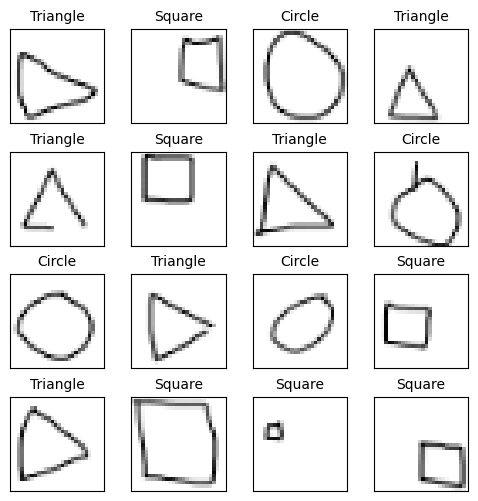

In [207]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3)
y_vals = ["Circle", "Square", "Triangle"]
for ax in axes.flat:
    random_index = np.random.randint(300)
    ax.imshow(X_train[random_index].reshape(28,28), cmap="grey")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{y_vals[int(y_train[random_index][0])]}", fontsize=10)

In [208]:
SPNModel = Sequential([
    Dense(units=128, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=3, activation="linear")
], name="SPN")
SPNModel.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.001))

In [ ]:
SPNModel.fit(X_train, y_train, epochs=1000, shuffle=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


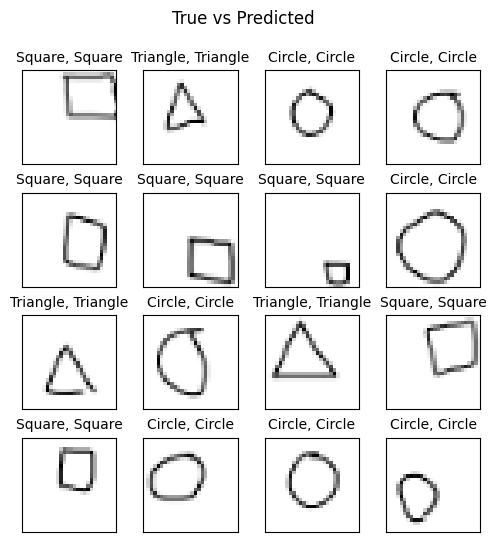

In [210]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.suptitle("True vs Predicted")
fig.subplots_adjust(hspace=0.3)
y_vals = ["Circle", "Square", "Triangle"]
for ax in axes.flat:
    random_index = np.random.randint(300)
    ax.imshow(X_train[random_index].reshape(28,28), cmap="grey")
    ax.set_xticks([])
    ax.set_yticks([])
    prediction = np.argmax(tf.nn.softmax(SPNModel.predict(X_train[random_index].reshape(1, -1))))
    ax.set_title(f"{y_vals[int(y_train[random_index][0])]}, {y_vals[prediction]}", fontsize=10)

## Testing From my Camera

In [211]:
def predict(file_dir):
    image = Image.open(file_dir)
    image = image.resize((28, 28))
    image = np.asarray(image)
    X = rgb2gray(image)/255
    return y_vals[np.argmax(tf.nn.softmax(SPNModel.predict(X.reshape(1,-1))))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[]

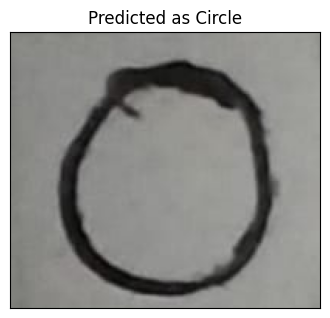

In [212]:
test_circle = plt.imread("./test_images/test_circle.jpg")
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(test_circle)
axes.set_title(f"Predicted as {predict("./test_images/test_circle.jpg")}")
axes.set_xticks([])
axes.set_yticks([])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[]

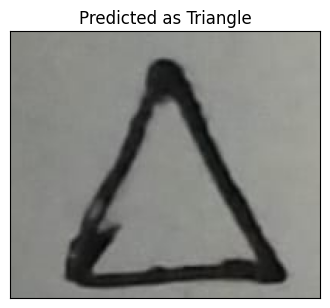

In [213]:
test_triangle = plt.imread("./test_images/test_triangle.jpg")
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(test_triangle)
axes.set_title(f"Predicted as {predict("./test_images/test_triangle.jpg")}")
axes.set_xticks([])
axes.set_yticks([])

In [214]:
def predict(file_dir):
    image = Image.open(file_dir)
    image = image.resize((28, 28))
    image = np.asarray(image)
    X = rgb2gray(image)/255
    return np.argmax(tf.nn.softmax(SPNModel.predict(X.reshape(1,-1))))